In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import StringSimilarityEncoder

In [2]:
# Helper function for loading and preprocessing data
def load_titanic() -> pd.DataFrame:
    translate_table = str.maketrans('' , '', string.punctuation)
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['home.dest'] = (
        data['home.dest']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    data['name'] = (
        data['name']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    data['ticket'] = (
        data['ticket']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    return data

In [3]:
# Load dataset
data = load_titanic()

In [4]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived', 'sex', 'cabin', 'embarked'], axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0
)

In [5]:
# set up the encoder
encoder = StringSimilarityEncoder(top_categories=2, variables=['name', 'home.dest', 'ticket'])

In [6]:
# fit the encoder
encoder.fit(X_train)

StringSimilarityEncoder(top_categories=2,
                        variables=['name', 'home.dest', 'ticket'])

In [7]:
encoder.encoder_dict_

{'name': ['mellinger miss madeleine violet', 'barbara mrs catherine david'],
 'home.dest': ['', 'new york ny'],
 'ticket': ['ca 2343', 'ca 2144']}

In [8]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

In [9]:
train_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_None,home.dest_new york ny,ticket_ca 2343,ticket_ca 2144
501,2,13,0,1,19.5,14,NaN,1.000000,0.517241,0.0,0.375000,0.307692,0.461538
588,2,4,1,1,23,14,NaN,0.521739,0.380952,0.0,0.571429,0.333333,0.333333
402,2,30,1,0,13.8583,12,NaN,0.644068,0.618182,0.0,0.368421,0.526316,0.631579
1193,3,NaN,0,0,7.725,NaN,NaN,0.510638,0.511628,1.0,0.000000,0.333333,0.166667
686,3,22,0,0,7.725,13,NaN,0.666667,0.679245,0.0,0.344828,0.461538,0.461538


In [10]:
test_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_None,home.dest_new york ny,ticket_ca 2343,ticket_ca 2144
1139,3,38,0,0,7.8958,NaN,NaN,0.454545,0.550000,1.0,0.000000,0.461538,0.461538
533,2,21,0,1,21,12,NaN,0.615385,0.524590,0.0,0.370370,0.307692,0.307692
459,2,42,1,0,27,NaN,NaN,0.596491,0.603774,0.0,0.352941,0.461538,0.461538
1150,3,NaN,0,0,14.5,NaN,NaN,0.641509,0.693878,1.0,0.000000,0.307692,0.307692
393,2,25,0,0,31.5,NaN,NaN,0.408163,0.666667,0.0,0.437500,0.666667,0.666667


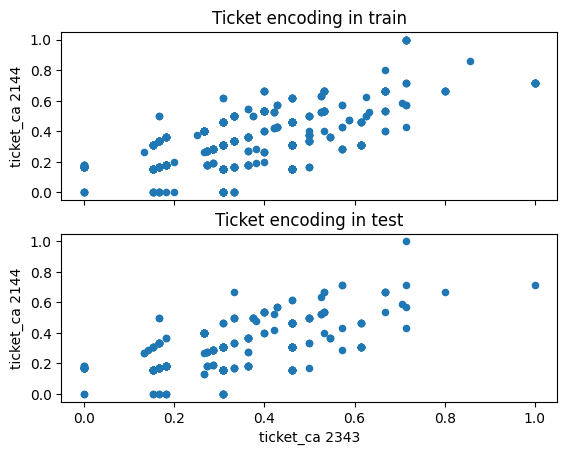

In [11]:
# plot encoded column - ticket
fig, ax = plt.subplots(2, 1);
train_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in train', ax=ax[0]);
test_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in test', ax=ax[1]);

In [12]:
# defining encoder that ignores NaNs
encoder = StringSimilarityEncoder(
    top_categories=2,
    handle_missing='ignore',
    variables=['name', 'home.dest', 'ticket']
)

In [13]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(handle_missing='ignore', top_categories=2,
                        variables=['name', 'home.dest', 'ticket'])

In [14]:
encoder.encoder_dict_

{'name': ['mellinger miss madeleine violet', 'barbara mrs catherine david'],
 'home.dest': ['new york ny', 'london'],
 'ticket': ['ca 2343', 'ca 2144']}

In [15]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

In [16]:
train_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_new york ny,home.dest_london,ticket_ca 2343,ticket_ca 2144
501,2,13,0,1,19.5,14,NaN,1.000000,0.517241,0.375000,0.370370,0.307692,0.461538
588,2,4,1,1,23,14,NaN,0.521739,0.380952,0.571429,0.434783,0.333333,0.333333
402,2,30,1,0,13.8583,12,NaN,0.644068,0.618182,0.368421,0.242424,0.526316,0.631579
1193,3,NaN,0,0,7.725,NaN,NaN,0.510638,0.511628,NaN,NaN,0.333333,0.166667
686,3,22,0,0,7.725,13,NaN,0.666667,0.679245,0.344828,0.226415,0.461538,0.461538


In [17]:
test_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_new york ny,home.dest_london,ticket_ca 2343,ticket_ca 2144
1139,3,38,0,0,7.8958,NaN,NaN,0.454545,0.550000,NaN,NaN,0.461538,0.461538
533,2,21,0,1,21,12,NaN,0.615385,0.524590,0.370370,0.454545,0.307692,0.307692
459,2,42,1,0,27,NaN,NaN,0.596491,0.603774,0.352941,1.000000,0.461538,0.461538
1150,3,NaN,0,0,14.5,NaN,NaN,0.641509,0.693878,NaN,NaN,0.307692,0.307692
393,2,25,0,0,31.5,NaN,NaN,0.408163,0.666667,0.437500,0.222222,0.666667,0.666667


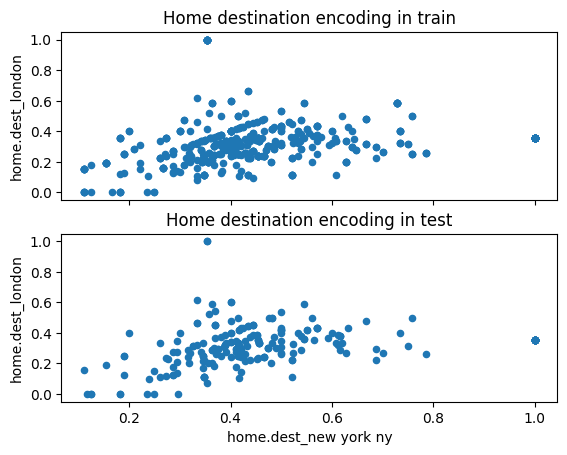

In [18]:
# plot encoded column - home.dest
fig, ax = plt.subplots(2, 1);
train_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_london',
    sharex=True,
    title='Home destination encoding in train',
    ax=ax[0]
);
test_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_london',
    sharex=True,
    title='Home destination encoding in test',
    ax=ax[1]
);

In [19]:
# These encoded columns could also be compressed further to reduce dimensions
# since they are not boolean, but real numbers
from sklearn.decomposition import PCA

In [20]:
# defining encoder for home destination
encoder = StringSimilarityEncoder(
    top_categories=None,
    handle_missing='impute',
    variables=['home.dest']
)

In [21]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(variables=['home.dest'])

In [22]:
# transform the data
train_t = encoder.transform(X_train)

In [23]:
# check the shape (should be pretty big)
train_t.shape

(916, 295)

In [24]:
# take home.dest encoded columns
home_encoded = train_t.filter(like='home.dest')

In [25]:
# defining PCA for compression
pca = PCA(n_components=0.9)

In [26]:
# train PCA
pca.fit(home_encoded)

PCA(n_components=0.9)

In [27]:
# transform train and test datasets
train_compressed = pca.transform(home_encoded)

In [28]:
# check compressed shape (should be way smaller)
train_compressed.shape

(916, 1)